In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'TN'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

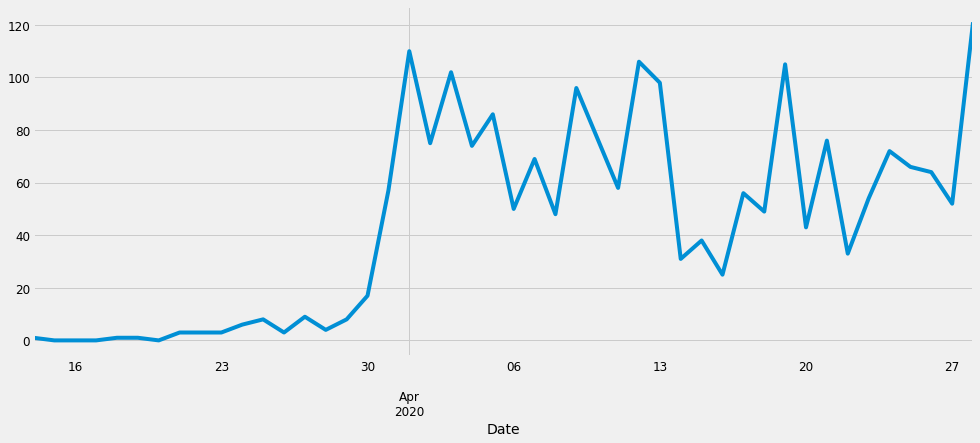

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

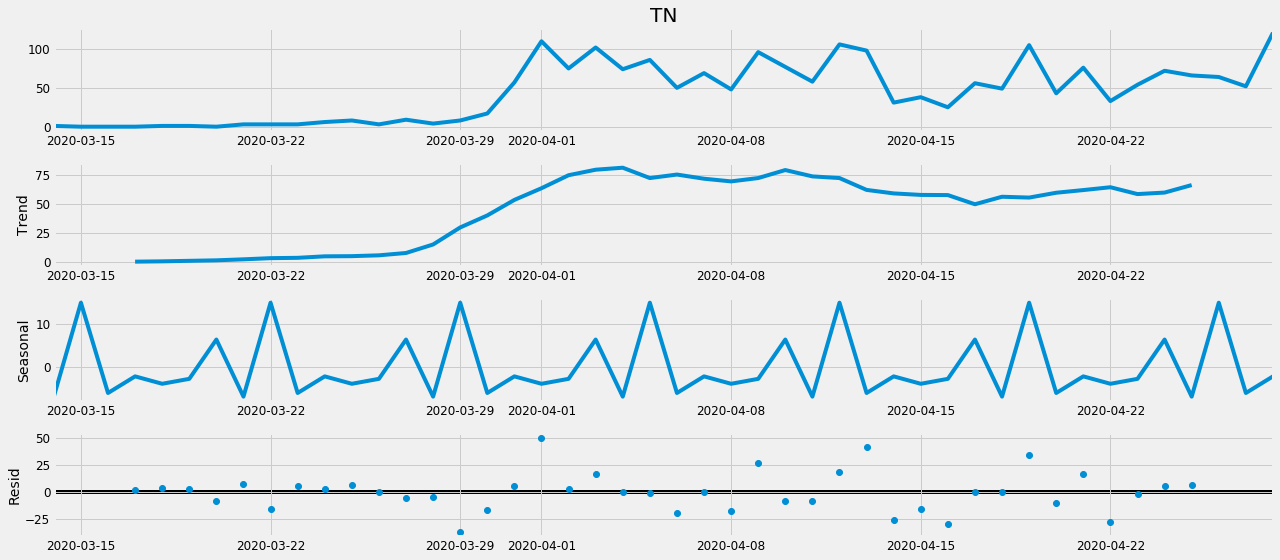

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:496.48418363319905


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1538.0628540801588
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:357.74683103021556
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:220.9890536258656
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:368.4141757943036


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1360.0645089242914
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:232.59669005145128
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:222.79738211807958
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:463.968223030255


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2412.7400350012067
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:335.1360881570292
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:208.1351369816375
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:355.05277013416764


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2405.768423862378
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:229.1883674143853
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:210.0534129290934
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:422.3858637697365


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1289.1942112195752
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:320.051691048449
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:204.08040857376588
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:325.1761820940872


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1360.9874969628886
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:214.76395524219961
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:207.2253963540618
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:407.0521976249691


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1258.7361689276238
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:312.1798510911823
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:192.43547023733305
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:323.5467459923471


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1251.877702472332
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:214.70825658151827
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:196.7570782361206
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:431.88674300501674


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1412.3753397586388
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:328.70500857679735
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:212.13949866216691
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:325.9800405249222


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1405.261845698163
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:212.92570762236744
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:214.92567511568984
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:417.6208375629737


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1261.7933412716998
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:321.46548693533464
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:202.63227782652885
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:325.45341013460256


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1207.148881594343
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:211.56319966191938
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:203.70586018703995
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:414.4461968996396


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1283.8772857535973
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:320.5875015378376
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:201.82392408171296
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:313.4948605723806


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1276.5301797277702
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:204.3700150209042
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:206.11367935132483
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:407.9255266476224


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1205.113431559652
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:312.5885171138726
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:193.3358350080195
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:314.7790661073522
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1203.0064337908134
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:206.19523712470794
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:197.7064283214007


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6021      0.500     -1.204      0.229      -1.582       0.378
ma.L1          0.2000      0.670      0.299      0.765      -1.113       1.513
ma.S.L12      -1.0000      0.331     -3.021      0.003      -1.649      -0.351
sigma2       706.8239      0.000   1.51e+06      0.000     706.823     706.825


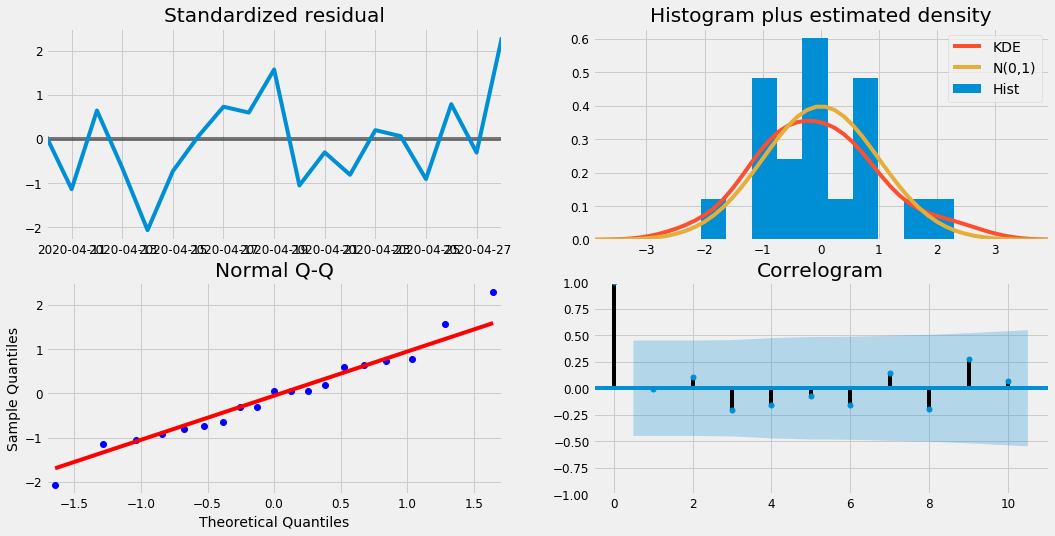

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

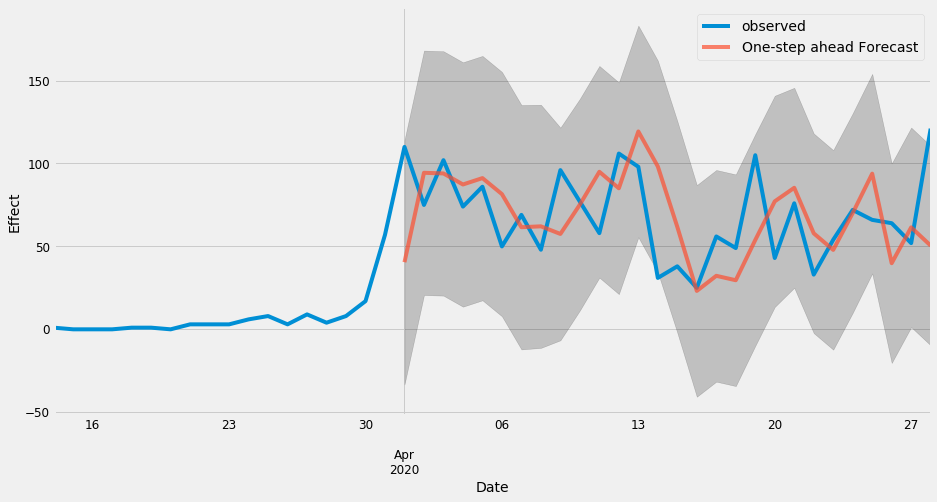

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 980.45


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 31.31


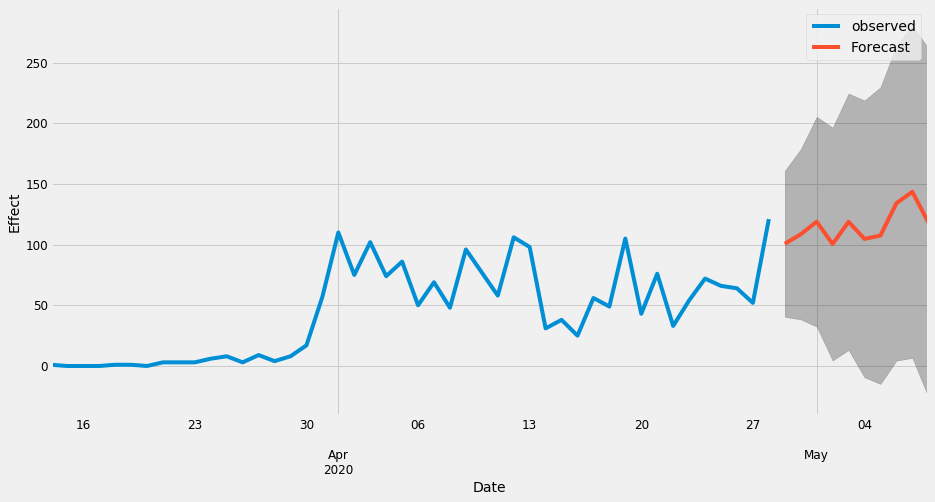

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,72,114
2020-04-25,66,94
2020-04-26,64,60
2020-04-27,52,54
2020-04-28,121,54


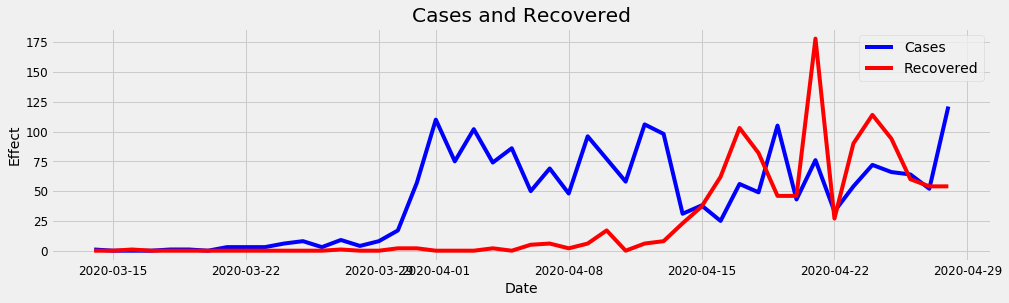

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

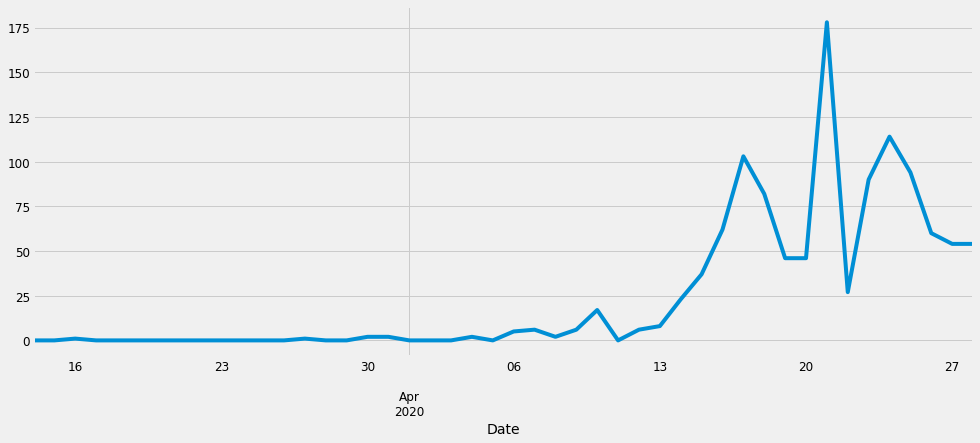

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

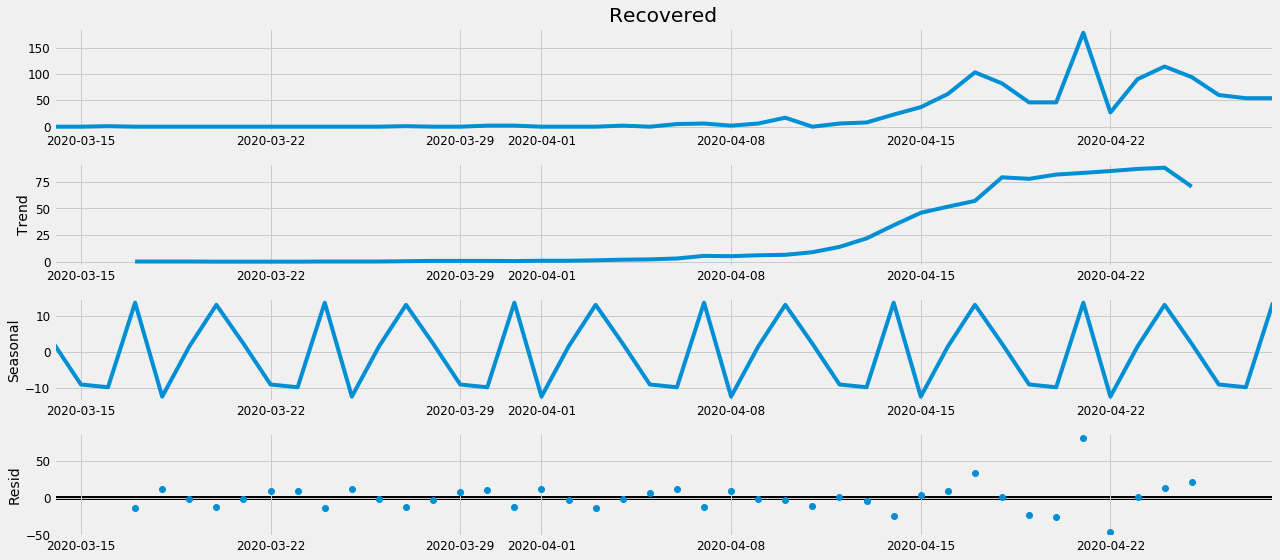

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:476.30051890113003


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1354.583950321886
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:354.6819191841498
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:237.49793765514434
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:365.1094825928743


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:789.2038999998931
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:247.34948140444732
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:239.4960687313879
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:451.7073358707982


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1333.1946848217935
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:337.5073386991419
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:223.81751554635332
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:358.4519362013939


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1307.3168106221483
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:243.51086997443727
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:225.81747843378528
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:437.60816383526463


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1619.3585077180185
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:333.30363734282224
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:219.36319368124126
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:336.53557407182234
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1403.7913678199993
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:225.05824588539227
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:217.49674385113647
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:411.0806018211231


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1548.7625316736564
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:314.416606213008
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:203.0671278543752
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:324.993551777642


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1552.6847400767424
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:218.51332427011525
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:201.77417872300978
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:442.8390206350596


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1527.8592906757024
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:338.36047707107133
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:227.6334714079871
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:337.5353301639445


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1501.1172523842436
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:226.3433133694459
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:228.3422330538006
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:421.8806130441775


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1495.7665628489526
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:324.7665609125404
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:214.45833804875068
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:324.8550209298449


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1471.5372630414663
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:219.26013287109487
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:211.74358642847218
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:426.24405514328487


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1137.8780713848919
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:326.549664349506
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:215.4272045861312
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:321.070339626928


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1456.1502701036206
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:212.2281273572761
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:214.22540859902827
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:411.73923441674617


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1306.7801098767868
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:316.01917534869494
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:204.62346420135478
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:316.96055373733907


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1574.2319908948734
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:210.308988168767
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:203.061945607867


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2085      0.546     -0.382      0.703      -1.279       0.862
ma.L1         -0.5712      0.511     -1.119      0.263      -1.572       0.429
ma.S.L12      -1.0005   1304.379     -0.001      0.999   -2557.537    2555.536
sigma2      1278.0324   1.67e+06      0.001      0.999   -3.27e+06    3.27e+06


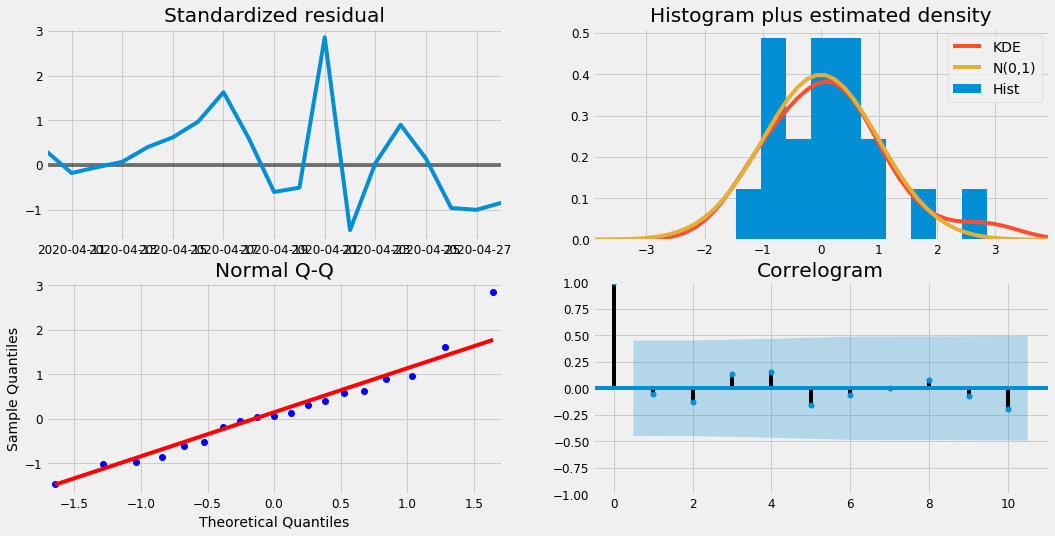

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

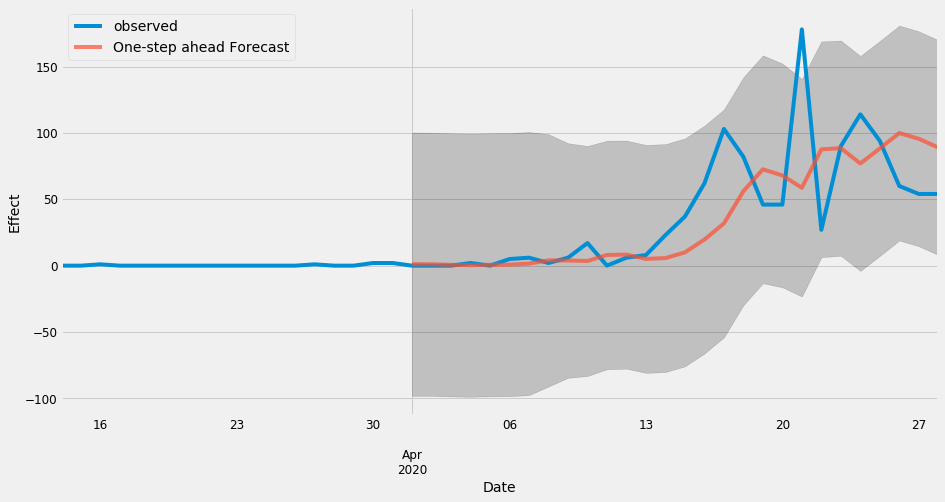

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 1211.55


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 34.81


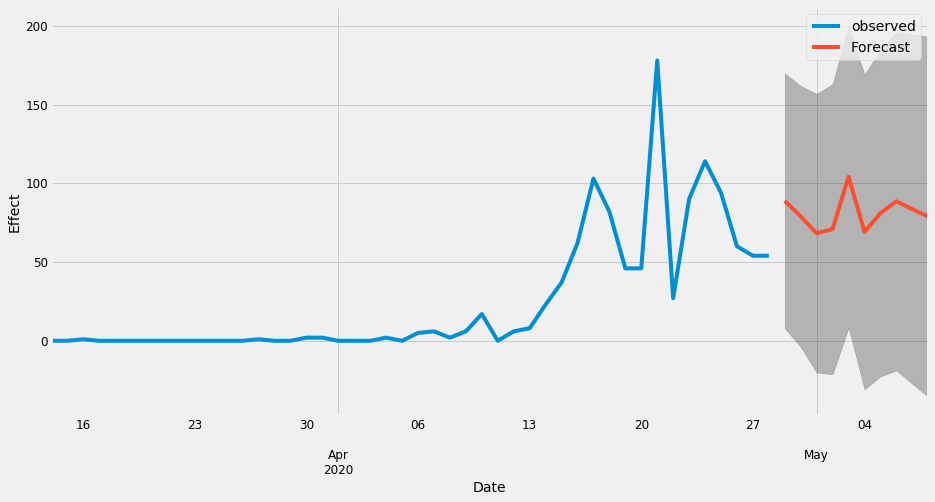

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

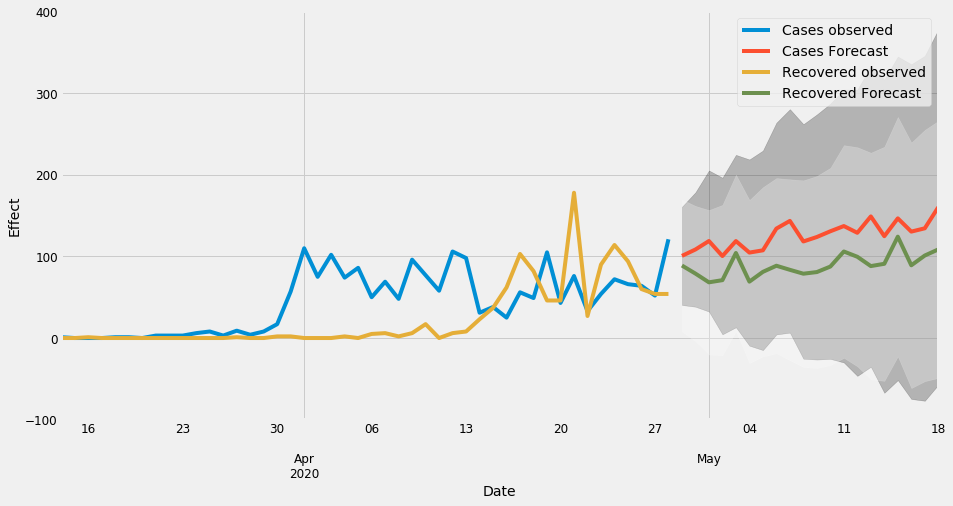

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

215

In [33]:
int(min(cases_result_date[0]))

100

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-29


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-08


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-07-14
